In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!git clone https://github.com/alexgugnin/galactic_CR_backtracking

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

particles:list = ['H', 'He', 'C', 'Fe']
colors:list = ['blue', 'orange', 'green', 'red']

## Transformation functions to match the desired coordinates rotation

In [ ]:
def sim_transform(arr):
  arr_transf = []
  for lon in arr:
    if lon >= 0:
      lon = lon-2*lon
      arr_transf.append(lon)
      continue
    if lon < 0:
      lon = lon+2*(-lon)
      arr_transf.append(lon)

  return arr_transf

def inits_transform(initial_lons, initial_lats) -> tuple:
  import numpy as np
  initial_lats = np.array([np.pi/2 - lat for lat in initial_lats])
  '''
  TRANSFORMATION for inits
  '''
  temp = []
  initial_lons = np.array(initial_lons)
  for lon in initial_lons:
    if lon >= np.pi: lon -= np.pi*2
    temp.append(lon)
  temp_lons = []
  for lon in temp:
    if lon >= 0:
      lon = lon-2*lon
      temp_lons.append(lon)
      continue
    if lon < 0:
      lon = lon+2*(-lon)
      temp_lons.append(lon)

  return temp_lons, initial_lats

## Gathering data

In [ ]:
total_results = pd.read_csv('drive/MyDrive/High_energy_astro/results_100sims_all_events.csv').drop('Unnamed: 0', axis=1)
initial_cords = pd.read_csv('drive/MyDrive/High_energy_astro/initial_cords_all_events.csv').drop('Unnamed: 0', axis=1)

In [ ]:
total_results.head()

,H,aH,He,C,Fe
0,"(2.0114201100394116, 2.0354282226101983)","(2.1449443096416925, 1.9573698184738106)","(1.9348151107243026, 2.056808333583127)","(1.6747781427368411, 2.1511746361437165)","(2.0143306564414187, 2.20956145856857)"
1,"(2.008912680053812, 2.0275371121947976)","(2.1474479091264302, 1.9424859887475137)","(1.9562426366841694, 2.060893622321668)","(1.690333907002155, 2.1459932401253736)","(1.1880160359316068, 1.847485819640922)"
2,"(2.023385749693046, 2.040987351761741)","(2.1516191795301456, 1.9485945510039826)","(1.963769221824823, 2.054573495097299)","(1.6055074602772104, 2.1496950868819815)","(0.5344116567236379, -2.8724899622721707)"
3,"(2.0094963036291005, 2.0330048012465745)","(2.143222849187639, 1.959350143953825)","(1.9649974952185663, 2.0601506250460764)","(1.6379416423467783, 2.1401481036466152)","(0.4555048194457463, 1.6584734031557056)"
4,"(2.0085943811717066, 2.0240311769756105)","(2.1480337662392754, 1.9521815332393058)","(1.9612354557040286, 2.0658339270665933)","(1.6703187311694354, 2.118584982333416)","(1.0428049000876722, 2.321032906581668)"


In [ ]:
total_results['H'] = total_results['H'].apply(lambda x: (float(x[1:-1].split(',')[0]), float(x[1:-1].split(',')[1])))
total_results['aH'] = total_results['aH'].apply(lambda x: (float(x[1:-1].split(',')[0]), float(x[1:-1].split(',')[1])))
total_results['He'] = total_results['He'].apply(lambda x: (float(x[1:-1].split(',')[0]), float(x[1:-1].split(',')[1])))
total_results['C'] = total_results['C'].apply(lambda x: (float(x[1:-1].split(',')[0]), float(x[1:-1].split(',')[1])))
total_results['Fe'] = total_results['Fe'].apply(lambda x: (float(x[1:-1].split(',')[0]), float(x[1:-1].split(',')[1])))

## Full map

In [ ]:
particles:list = ['H', 'He', 'C', 'Fe']
colors:list = ['#1034a6', '#412f88', '#a2264b', '#f62d2d']

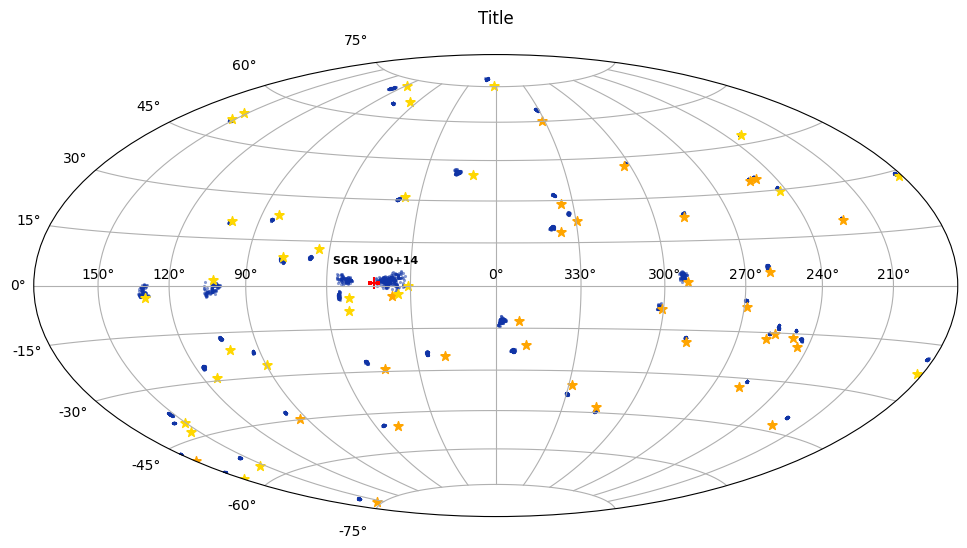

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(111, projection = 'hammer')
plt.grid(True)
plt.title('Title', y=1.05)

#Plotting sims
particles:list = ['H', 'He', 'C', 'Fe']
colors:list = ['#1034a6', '#412f88', '#a2264b', '#f62d2d']
idx = 0
particles = [particles[idx]]
colors = [colors[idx]]
for particle, color in zip(particles, colors):
  x, y = np.array([_[1] for _ in np.array(total_results[particle])]), np.pi/2 - np.array([_[0] for _ in np.array(total_results[particle])])
  plt.scatter(sim_transform(x), y, marker='o', linewidths=0, s = 5, c=color, alpha=0.5)

#Plotting events
lons, lats = inits_transform(initial_cords['lons'], initial_cords['lats'])
#ta_lons, ta_lats = [lons[23], lons[22]], [lats[23], lats[22]]#lons[:28], lats[:28]
#pa_lons, pa_lats = [lons[27+3]], [lats[27+3]]#lons[28:], lats[28:]
ta_lons, ta_lats = lons[:28], lats[:28]
pa_lons, pa_lats = lons[28:], lats[28:]
plt.scatter(pa_lons, pa_lats, marker='*', c='orange', s=50)
plt.scatter(ta_lons, ta_lats, marker='*', c='gold', s=50)

sgr = plt.scatter(0.751-2*0.751, 0.0135, marker='+', c='red', s=70)#SGR 1900+14
plt.text(0.751-2*0.751 - 15*np.pi/180, 0.0135+7*np.pi/180, 'SGR 1900+14', fontsize=8, fontweight='bold')#SGR 1900+14

#Legend
legend_elements = [#Line2D([0], [0], color='black', lw=1, label='Galaxy clusters'),
                    #Line2D([0], [0], color='purple', lw=1, label='Local Void'),
                    #Line2D([0], [0], marker='*', color='orange', label='CRs E > 100 EeV', markerfacecolor='orange', linestyle='', markersize=8),
                    Line2D([0], [0], marker='*', color='orange', label='CRs from PA', markerfacecolor='orange', linestyle='', markersize=8),
                    Line2D([0], [0], marker='*', color='gold', label='CRs from TA', markerfacecolor='gold', linestyle='', markersize=8),
                    #Line2D([0], [0], marker='o', color='blue', label='Simulated CRs', markerfacecolor='blue', linestyle='', markersize=8), #make variable colors
                    #Line2D([0], [0], marker='p', color='pink', label='Magnetars', markerfacecolor='pink', linestyle='', markersize=8),
                    #Line2D([0], [0], marker='D', color='turquoise', label='starburst galaxies', markerfacecolor='turquoise', linestyle='', markersize=8),
                    Line2D([0], [0], marker='+', color='red', label='SGR 1900+14', markerfacecolor='red', linestyle='', markersize=8)
                    ]
#plt.legend(handles=legend_elements, loc='upper right')
#Ticks
#x_tick_labels = ['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°']
x_tick_labels = ['150°', '120°', '90°', '', '', '0°', '330°', '300°', '270°', '240°', '210°']
x_tick_positions = [-5*np.pi/6, -2*np.pi/3, -np.pi/2, -np.pi/3, -np.pi/6, 0, np.pi/6, np.pi/3, np.pi/2, 2*np.pi/3, 5*np.pi/6]

plt.xticks(x_tick_positions, labels=x_tick_labels)
plt.savefig(f'{particles[0]}.png', dpi=300, bbox_inches='tight')
plt.show()

### Plot for conf

In [ ]:
from PIL import Image

H = Image.open("H.png")
He = Image.open("He.png")
C = Image.open("C.png")
Fe = Image.open("Fe.png")

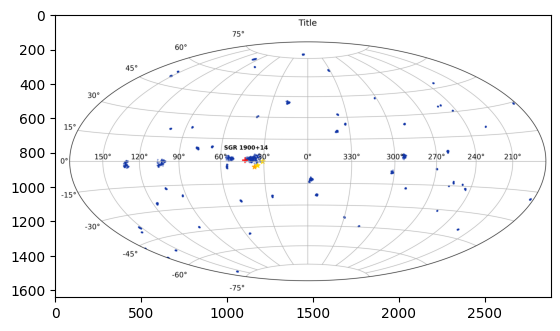

In [ ]:
plt.imshow(H)

In [ ]:
H.crop((925, 670, 1255, 1000)).size

(330, 330)

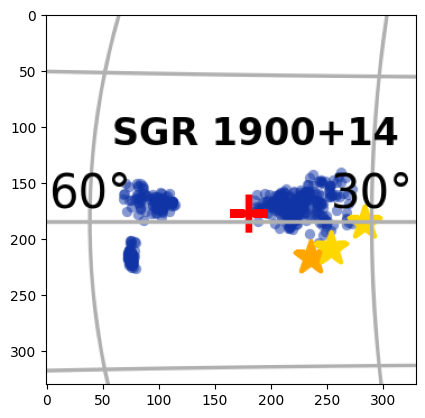

In [ ]:
plt.imshow(H.crop((925, 670, 1255, 1000)))

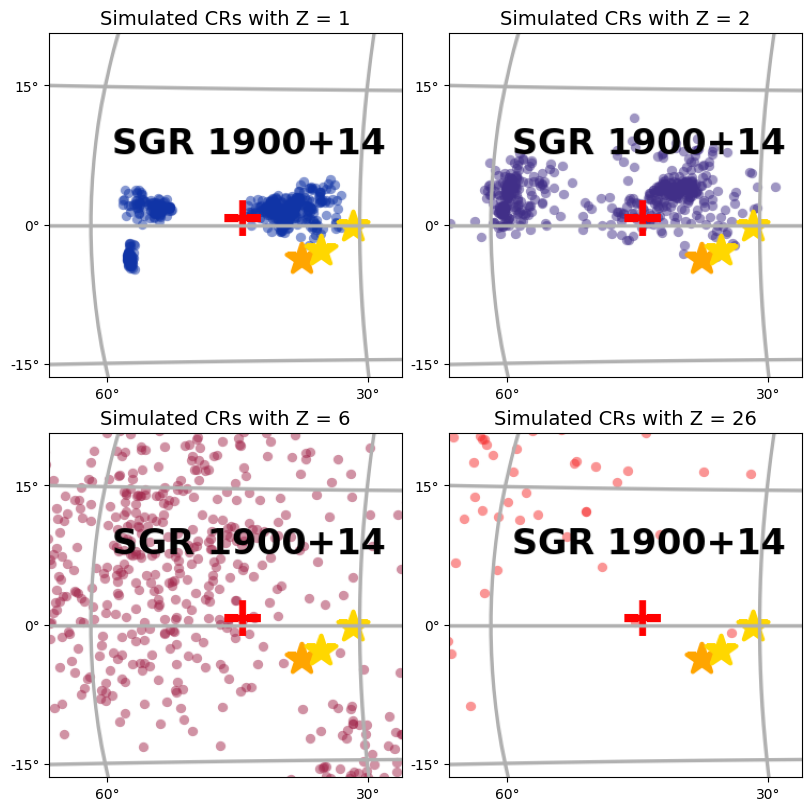

In [ ]:
fig, axs = plt.subplot_mosaic([
    ["H", "He"],
    ["C", "Fe"]],
    figsize=(8, 8), layout='constrained')

y_ticks = [50, 183.5, 316.5]
y_labels = ["15°", "0°", "-15°"]
x_ticks = [54, 298]
x_labels = ["60°", "30°"]

axs["H"].set_title("Simulated CRs with Z = 1", fontsize = 14)
axs["H"].imshow(H.crop((925, 670, 1255, 1000)), aspect="auto")
axs["H"].set_xticks(x_ticks, x_labels)
axs["H"].set_yticks(y_ticks, y_labels)

axs["He"].set_title("Simulated CRs with Z = 2", fontsize = 14)
axs["He"].imshow(He.crop((925, 670, 1255, 1000)), aspect="auto")
axs["He"].set_xticks(x_ticks, x_labels)
axs["He"].set_yticks(y_ticks, y_labels)

axs["C"].set_title("Simulated CRs with Z = 6", fontsize = 14)
axs["C"].imshow(C.crop((925, 670, 1255, 1000)), aspect="auto")
axs["C"].set_xticks(x_ticks, x_labels)
axs["C"].set_yticks(y_ticks, y_labels)

axs["Fe"].set_title("Simulated CRs with Z = 26", fontsize = 14)
axs["Fe"].imshow(Fe.crop((925, 670, 1255, 1000)), aspect="auto")
axs["Fe"].set_xticks(x_ticks, x_labels)
axs["Fe"].set_yticks(y_ticks, y_labels)

fig.savefig("simulations_in_SGR_locals.png", dpi=300, bbox_inches="tight")

### Plotting only SGR local space

In [ ]:
!pip install mw-plot

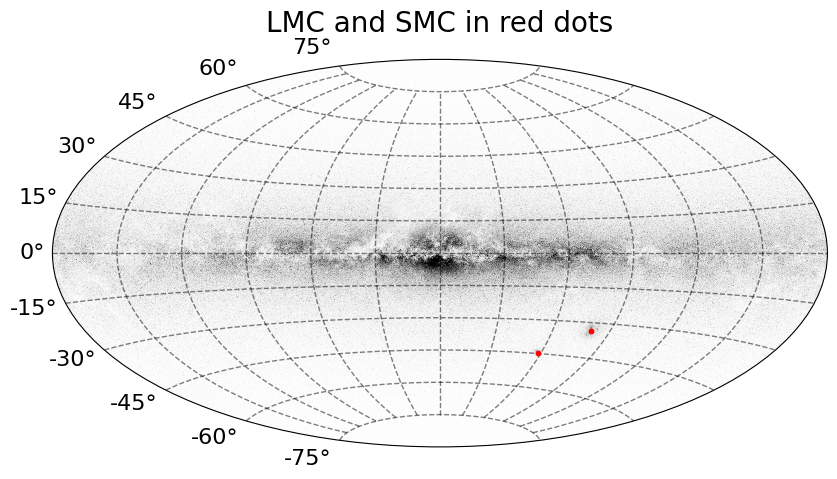

In [ ]:
import numpy as np
from astropy import units as u
from mw_plot import MWSkyMap

mw1 = MWSkyMap(projection="aitoff", grayscale=True, grid=True)
mw1.title = "LMC and SMC in red dots"

# LMC and SMC coordinates
lsmc_ra = [78.77, 16.26] * u.degree
lsmc_dec = [-69.01, -72.42] * u.degree

mw1.scatter(lsmc_ra, lsmc_dec, c="r", s=10)

## Plotting Trajectories

In [ ]:
def plotAll2DProjections(data, title:str = '', fname:str = '') -> None:
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

  fig.suptitle(title, y=1)
  I,X,Y,Z = data
  projections = [ax1, ax2, ax3]
  for projection, axis in enumerate([(1,2), (2,3), (1,3)]):
    for i in np.unique(I):
      projections[projection].plot([I,X,Y,Z][axis[0]][I == i], [I,X,Y,Z][axis[1]][I == i], lw=0.1, alpha=0.3, color='green')
    # plot Galactic center
    projections[projection].scatter(0,0, marker='o', color='black', alpha=0.5)
    # plot Earth
    earth_cords = [0, -8.5, 0, 0] #first 0 stands for I in data for generalising formulas (previously in scatter I've written earth_cords[axis[0] - 1])
    projections[projection].scatter(earth_cords[axis[0]], earth_cords[axis[1]], marker='P', color='blue')
    #Plot SGR 1900+14
    sgr_cords = [0, 12.5*np.cos(43.02*np.pi/180)*np.cos(0.77*np.pi/180) - 8.5, 12.5*np.sin(43.02*np.pi/180)*np.cos(0.77*np.pi/180), 12.5*np.sin(0.77*np.pi/180)]
    projections[projection].scatter(sgr_cords[axis[0]], sgr_cords[axis[1]], marker='+', c='red', s=80) #43.02 0.77 12.5±1.7
    #Plot GRS 1915+105
    grs_cords = [0, 8.6*np.cos(45.37*np.pi/180)*np.cos(-0.22*np.pi/180) - 8.5, 8.6*np.sin(45.37*np.pi/180)*np.cos(-0.22*np.pi/180), 8.6*np.sin(-0.22*np.pi/180)]
    projections[projection].scatter(grs_cords[axis[0]], grs_cords[axis[1]], marker='+', c='green', s=70) #45.37 -0.22 8.6+2.0-1.6
    #Plot SS 433 Мікроквазар 39.69 -2.24 5.5±0.2
    ss_cords = [0, 5.5*np.cos(39.69*np.pi/180)*np.cos(-2.24*np.pi/180) - 8.5, 5.5*np.sin(39.69*np.pi/180)*np.cos(-2.24*np.pi/180), 5.5*np.sin(-2.24*np.pi/180)]
    projections[projection].scatter(ss_cords[axis[0]], ss_cords[axis[1]], marker='+', c='purple', s=70) #39.69 -2.24 5.5±0.2
    #Plot NGC 6760 Кулясте скупчення 36.11 -3.9 7.4±0.4
    ngc_cords = [0, 7.4*np.cos(36.11*np.pi/180)*np.cos(-3.9*np.pi/180) - 8.5, 7.4*np.sin(36.11*np.pi/180)*np.cos(-3.9*np.pi/180), 7.4*np.sin(-3.9*np.pi/180)]
    projections[projection].scatter(ngc_cords[axis[0]], ngc_cords[axis[1]], marker='+', c='magenta', s=70) #36.11 -3.9 7.4±0.4

    labels = ['I', 'X', 'Y', 'Z']
    projections[projection].set(xlabel=f"{labels[axis[0]]} / kpc", ylabel=f"{labels[axis[1]]} / kpc")
    projections[projection].set_title(f"{labels[axis[0]]}O{labels[axis[1]]} flat surface")

    #Legend
    from matplotlib.lines import Line2D
    legend_elements = [
                      Line2D([0], [0], marker='+', color='red', label='SGR 1900+14', markerfacecolor='red', linestyle='', markersize=8),
                      Line2D([0], [0], marker='+', color='green', label='GRS 1915+105', markerfacecolor='green', linestyle='', markersize=8),
                      Line2D([0], [0], marker='+', color='purple', label='SS 433', markerfacecolor='purple', linestyle='', markersize=8),
                      Line2D([0], [0], marker='+', color='magenta', label='NGC 6760', markerfacecolor='magenta', linestyle='', markersize=8),
                      Line2D([0], [0], marker='P', color='blue', label='Earth', markerfacecolor='blue', linestyle='', markersize=8),
                      Line2D([0], [0], marker='o', color='black', label='Galaxy Center', markerfacecolor='black', linestyle='', markersize=8),
                      #Line2D([0], [0], lw=1, color='blue', label='H'),
                      #Line2D([0], [0], lw=1, color='blue', label='$\overline{H}$'),
                      #Line2D([0], [0], lw=1, color='orange', label='He'),
                      #Line2D([0], [0], lw=1, color='green', label='H'),
                      #Line2D([0], [0], lw=1, color='red', label='F'),
                      ]
  fig.legend(handles=legend_elements, loc='upper right')

  plt.savefig(fname, dpi=300, bbox_inches='tight')
  plt.show()

In [ ]:
data_22 = np.genfromtxt('drive/MyDrive/High_energy_astro/resulting_data_for_conf/mag_rand/final/traj_PA+TA_C_22_event_10000sims.txt', unpack=True, skip_footer=1)
data_23 = np.genfromtxt('drive/MyDrive/High_energy_astro/resulting_data_for_conf/mag_rand/final/traj_PA+TA_C_23_event_10000sims.txt', unpack=True, skip_footer=1)
data_30 = np.genfromtxt('drive/MyDrive/High_energy_astro/resulting_data_for_conf/mag_rand/final/traj_PA+TA_C_30_event_10000sims.txt', unpack=True, skip_footer=1)

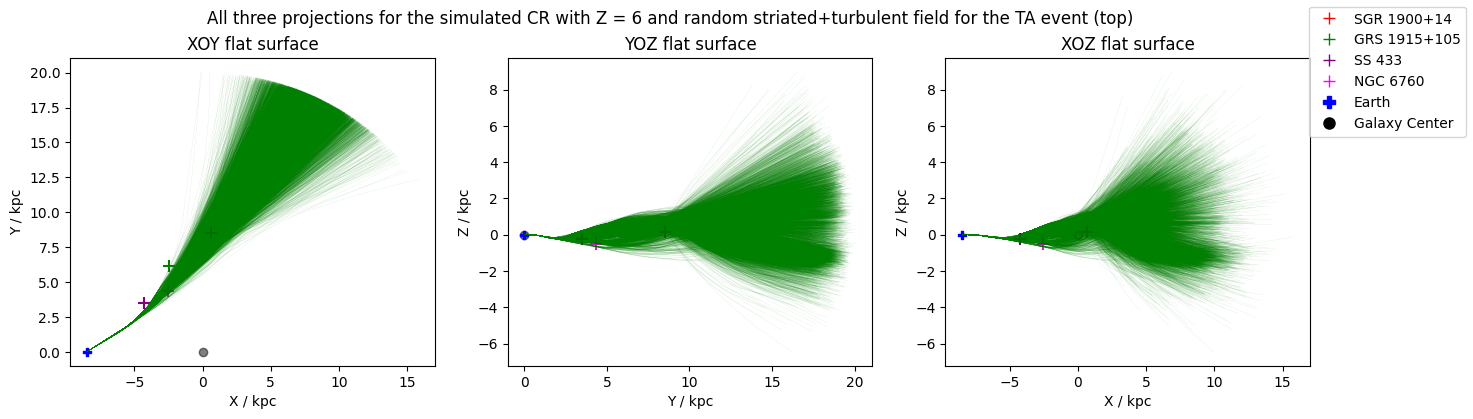

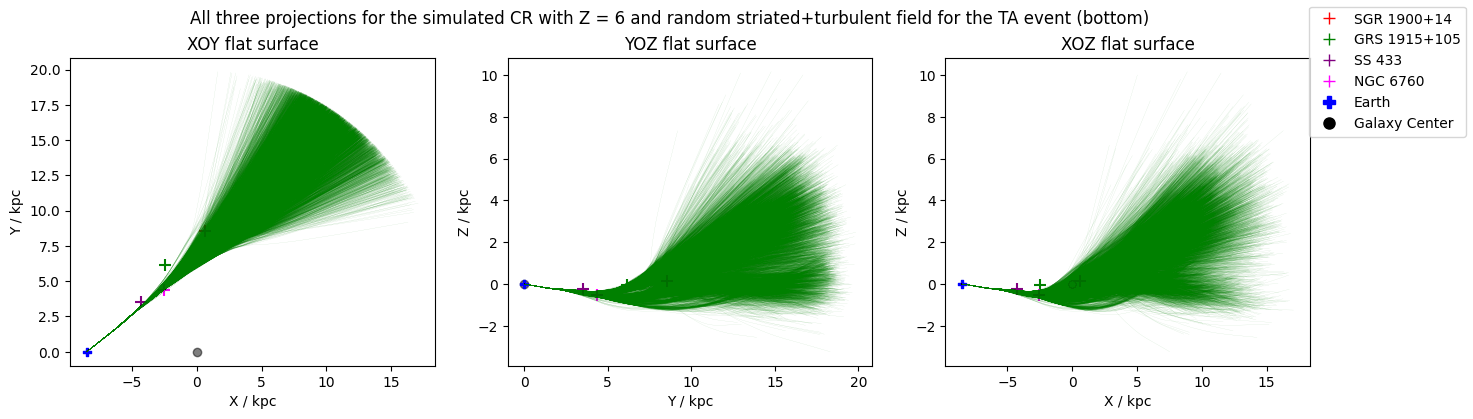

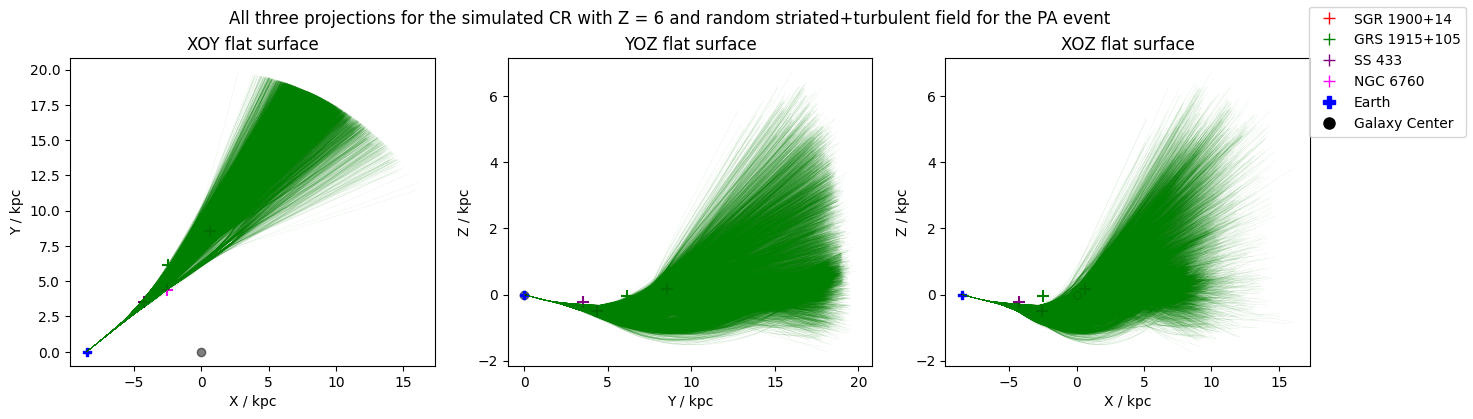

In [ ]:
plotAll2DProjections(data_22, title = "All three projections for the simulated CR with Z = 6 and random striated+turbulent field for the TA event (top)", fname = "drive/MyDrive/High_energy_astro/resulting_data_for_conf/plots_for_conf/mag_rand/comb/C_comb_22event_3projections.png")
plotAll2DProjections(data_23, title = "All three projections for the simulated CR with Z = 6 and random striated+turbulent field for the TA event (bottom)", fname = "drive/MyDrive/High_energy_astro/resulting_data_for_conf/plots_for_conf/mag_rand/comb/C_comb_23event_3projections.png")
plotAll2DProjections(data_30, title = "All three projections for the simulated CR with Z = 6 and random striated+turbulent field for the PA event", fname = "drive/MyDrive/High_energy_astro/resulting_data_for_conf/plots_for_conf/mag_rand/comb/C_comb_30event_3projections.png")

## Heatmaps


### Through distance to surface

Lets find a plane perpendicular to line of sight from the Earth and cut all the projections by distancing to that plane

To find the shortest distance between point and plane, we use the formula d = |A*x0 + B*y0 + C*z0 + D|/√(A^2 + B^2 + C^2)  where (x0, y0, z0) is the given point and Ax + By + Cz + D = 0 is the equation of the given plane.

A plane equation with normal vector (a,b,c) and passing through the point (x0,y0,z0) is a(x−x0)+b(y−y0)+c(z−z0)=0

In [ ]:
earth_cords = [0, -8.5, 0, 0]
sgr_cords = [0, 12.5*np.cos(43.02*np.pi/180)*np.cos(0.77*np.pi/180) - 8.5, 12.5*np.sin(43.02*np.pi/180)*np.cos(0.77*np.pi/180), 12.5*np.sin(0.77*np.pi/180)]
ngc_cords = [0, 7.4*np.cos(36.11*np.pi/180)*np.cos(-3.9*np.pi/180) - 8.5, 7.4*np.sin(36.11*np.pi/180)*np.cos(-3.9*np.pi/180), 7.4*np.sin(-3.9*np.pi/180)]

In [ ]:
def calcPerpPlane(target_cords, earth_cords = [0, -8.5, 0, 0]):
  '''Calculates the A, B, C, D for the plane'''
  norm = np.array([target_cords[1] - earth_cords[1], target_cords[2] - earth_cords[2], target_cords[3] - earth_cords[3]])
  D_plane = -(norm[0]*target_cords[1] + norm[1]*target_cords[2] + norm[2]*target_cords[3])
  #xx, yy = np.meshgrid(np.linspace(-20,20,160), np.linspace(-20,20,160))
  #z = (-norm[0] * xx - norm[1] * yy + D_plane)/norm[2]

  return norm, D_plane

In [ ]:
def calcEdge(x, y, z, norm, D_plane):
  ''' Finds the Last point which crosses observational surface'''
  old_distance = 1e5
  for idx in range(len(x)):
    new_distance = abs(norm[0]*x[idx] + norm[1]*y[idx] + norm[2]*z[idx] + D_plane)/np.sqrt(norm[0]**2 + norm[1]**2 + norm[2]**2)
    if ((new_distance > old_distance) and (new_distance <= 0.2)):
      x = x[:idx]
      y = y[:idx]
      z = z[:idx]
      return x, y, z
    else:
      old_distance = new_distance

In [ ]:
def r_mat(angle):
  '''Rotate over Z'''
  r_matrix = np.array([
      [np.cos(angle), -np.sin(angle), 0],
      [np.sin(angle), np.cos(angle),   0],
      [0,               0,           1]
  ])
  return r_matrix

In [ ]:
def rotate_yz(x, y, z, norm):
  '''Ortogonal transformation of a plane'''
  abs_norm = np.sqrt(norm[0]**2 + norm[1]**2 + norm[2]**2)
  alpha = np.arccos(norm[0]/abs_norm)
  beta = np.arccos(norm[1]/abs_norm)
  gamma = np.arccos(norm[2]/abs_norm)
  data_before_rot = np.vstack((x,y,z))
  data_after_rot = np.matmul(r_mat(-alpha), data_before_rot)

  return data_after_rot[:1].ravel(), data_after_rot[1:2].ravel(), data_after_rot[2:].ravel()

def makeCut(data, target_cords):
  '''Returns the point of intersection of the trajectory with the object surface.
  Doesnt make ortogonal transformation. Need to be merged with calcEdge?'''
  I,X,Y,Z = data
  x_nonrot, y_nonrot, z_nonrot = [], [], []
  for i in np.unique(I):
    norm, D_plane = calcPerpPlane(target_cords)
    try:
        _x, _y, _z = calcEdge(X[I == i], Y[I == i], Z[I == i], norm, D_plane)
    except:
        continue
    x_nonrot.append(_x[-1])
    y_nonrot.append(_y[-1])
    z_nonrot.append(_z[-1])

  x_rot, y_rot, z_rot = rotate_yz(x_nonrot, y_nonrot, z_nonrot, norm)

  return pd.DataFrame({'X':np.array(x_rot), 'Y':np.array(y_rot), 'Z':np.array(z_rot)})

In [ ]:
data_22 = np.genfromtxt('drive/MyDrive/High_energy_astro/seed_test/traj_PA+TA_Fe_22_event_10737418_seed.txt', unpack=True, skip_footer=1)
data_23 = np.genfromtxt('drive/MyDrive/High_energy_astro/seed_test/traj_PA+TA_Fe_23_event_10737418_seed.txt', unpack=True, skip_footer=1)
data_30 = np.genfromtxt('drive/MyDrive/High_energy_astro/seed_test/traj_PA+TA_Fe_30_event_10737418_seed.txt', unpack=True, skip_footer=1)

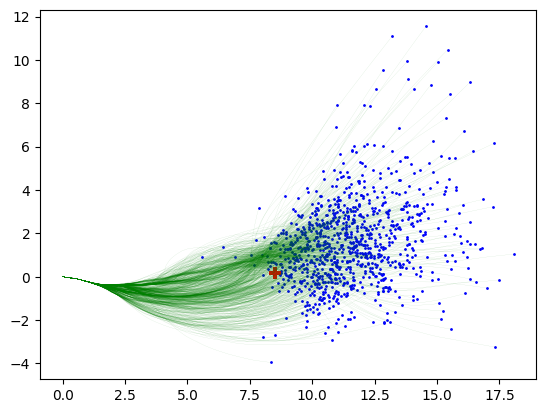

In [ ]:
I,X,Y,Z = data_30
for i in np.unique(I):
  norm, D_plane = calcPerpPlane(sgr_cords, earth_cords)
  try:
    x, y, z = calcEdge(X[I == i], Y[I == i], Z[I == i], norm, D_plane)
  except:
    continue
  plt.plot(y, z, lw=0.1, alpha=0.3, color='green')
  plt.scatter(y[-1], z[-1], s=1, color='blue')
  plt.scatter(sgr_cords[2], sgr_cords[3], marker='+', c='red', s=80)

Without ortogonal transformation, just projection

In [ ]:
I,X,Y,Z = data_30
x_nonrot, y_nonrot, z_nonrot = [], [], []
for i in np.unique(I):
  norm, D_plane = calcPerpPlane(sgr_cords, earth_cords)
  _x, _y, _z = calcEdge(X[I == i], Y[I == i], Z[I == i], norm, D_plane)
  x_nonrot.append(_x[-1])
  y_nonrot.append(_y[-1])
  z_nonrot.append(_z[-1])
temp_data = pd.DataFrame({'X':np.array(x_nonrot), 'Y':np.array(y_nonrot), 'Z':np.array(z_nonrot)})
temp_data

,X,Y,Z
0,-2.400,11.749,1.405
1,-2.413,11.794,0.939
2,-3.267,12.696,1.528
3,2.135,6.907,0.925
4,-2.376,11.727,1.378
...,...,...,...
995,-3.386,12.836,0.107
996,-4.090,13.493,4.472
997,-3.221,12.667,0.194
998,0.172,9.028,0.042


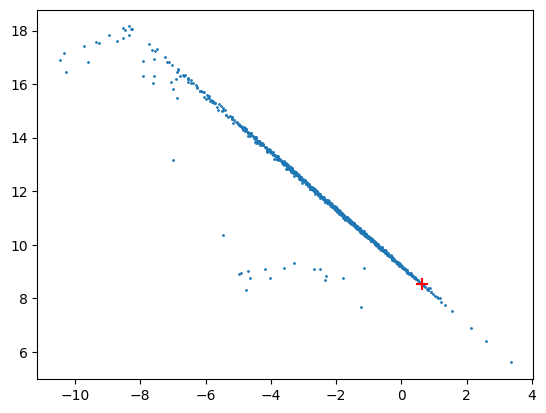

In [ ]:
plt.scatter(temp_data['X'], temp_data['Y'], s = 1)
plt.scatter(sgr_cords[1], sgr_cords[2], marker='+', c='red', s=80)

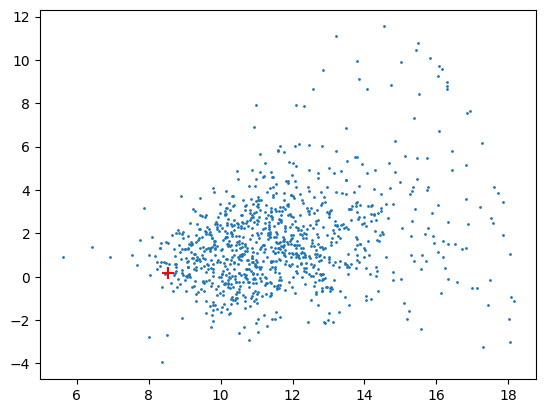

In [ ]:
plt.scatter(temp_data['Y'], temp_data['Z'], s = 1)
plt.scatter(sgr_cords[2], sgr_cords[3], marker='+', c='red', s=80)

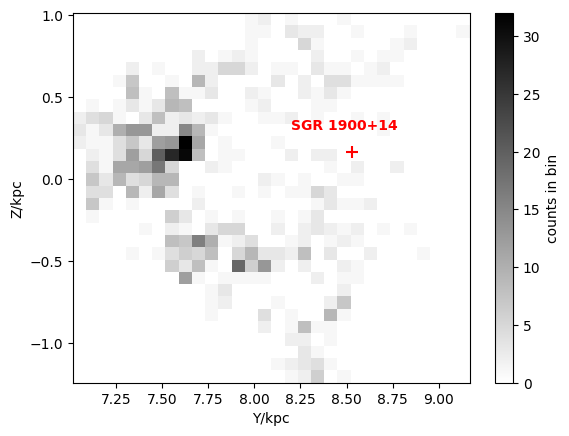

In [ ]:
plt.hist2d(y_nonrot, z_nonrot, bins=30, cmap='binary')
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.scatter(sgr_cords[2], sgr_cords[3], marker='+', c='red', s=80)
plt.xlabel('Y/kpc')
plt.ylabel('Z/kpc')
plt.text(8.2, 0.3, 'SGR 1900+14', fontsize=10, fontweight='bold', c = 'red')
plt.savefig("hist_23.png", dpi=300, bbox_inches='tight')

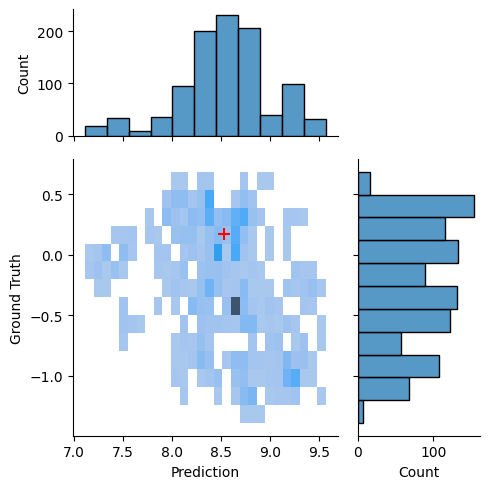

In [ ]:
nbins = int(np.ceil(np.log2(len(y))) + 1)
g0 = sns.jointplot(x=np.array(y), y=np.array(z), kind="hist", height=5, ratio=2,
                   marginal_ticks=True,
                   marginal_kws=dict(bins=nbins, fill=True))
g0.set_axis_labels('Prediction', 'Ground Truth', fontsize=10)
g0.figure.tight_layout()
plt.scatter(sgr_cords[2], sgr_cords[3], marker='+', c='red', s=80)
plt.show()

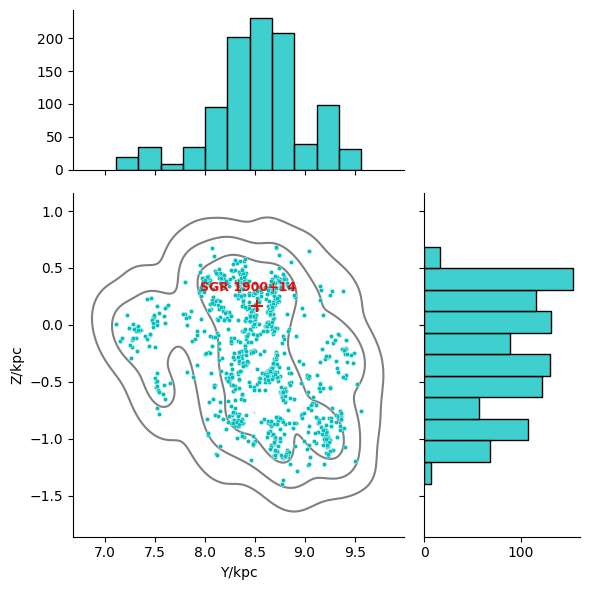

In [ ]:
import seaborn as sns

nbins = int(np.ceil(np.log2(len(y))) + 1)
'''
g0 = sns.jointplot(x=np.array(y), y=np.array(z), kind="hist", height=6, ratio=2,
                   marginal_ticks=True,
                   marginal_kws=dict(bins=nbins, fill=True),)
                   #scatter_kws = dict(s = 0.1, alpha=0.7))
'''
g0 = sns.jointplot(x=np.array(y_nonrot), y=np.array(z_nonrot), height=6, ratio=2,
                   marginal_ticks=True,
                   marginal_kws=dict(bins=nbins, fill=True),
                   s = 10, color = 'c')
g0.plot_joint(sns.kdeplot, color="grey", zorder=0, levels = [0.003, 0.05, 0.32])#levels=[0.68, 0.95, 0.997])
g0.set_axis_labels('Y/kpc', 'Z/kpc', fontsize=10)
g0.figure.tight_layout()
plt.scatter(sgr_cords[2], sgr_cords[3], marker='+', c='red', s=80)
plt.text(7.95, 0.3, 'SGR 1900+14', fontsize=9, fontweight='bold', c = 'red')
plt.savefig("scatter_kde_31.png", dpi=300, bbox_inches='tight')

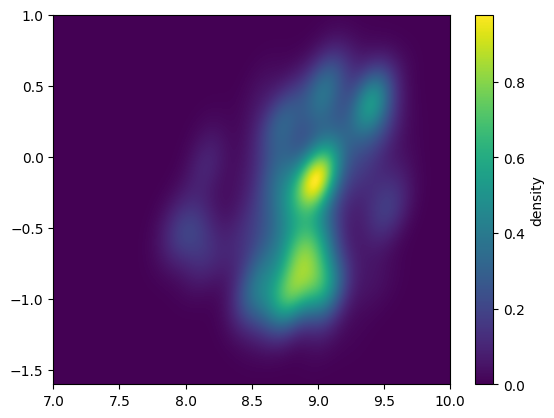

In [ ]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([y, z])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(6, 10, 1000)
ygrid = np.linspace(-1.6, 1, 1000)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
#plt.plot(Xgrid, Ygrid, Z)
plt.imshow(Z.reshape(Xgrid.shape), aspect='auto', cmap='viridis', extent = [7, 10, -1.6, 1])
cb = plt.colorbar()
#plt.scatter(sgr_cords[2], sgr_cords[3], marker='+', c='red', s=80)
cb.set_label("density")

Metrics

In [ ]:
data_22 = np.genfromtxt('drive/MyDrive/High_energy_astro/resulting_data_for_conf/uncert/traj_PA+TA_C_22_event_10000sims.txt', unpack=True, skip_footer=1)
data_23 = np.genfromtxt('drive/MyDrive/High_energy_astro/resulting_data_for_conf/uncert/traj_PA+TA_C_23_event_10000sims.txt', unpack=True, skip_footer=1)
data_30 = np.genfromtxt('drive/MyDrive/High_energy_astro/resulting_data_for_conf/uncert/traj_PA+TA_C_30_event_10000sims.txt', unpack=True, skip_footer=1)

In [ ]:
data_23 = np.genfromtxt('drive/MyDrive/High_energy_astro/resulting_data_for_conf/uncert/traj_PA+TA_C_23_event_10000sims.txt', unpack=True, skip_footer=1)
data_30 = np.genfromtxt('drive/MyDrive/High_energy_astro/resulting_data_for_conf/uncert/traj_PA+TA_C_30_event_10000sims.txt', unpack=True, skip_footer=1)

In [ ]:
data_30 = np.genfromtxt('drive/MyDrive/High_energy_astro/resulting_data_for_conf/mag_rand/final/traj_PA+TA_C_30_event_10000sims.txt', unpack=True, skip_footer=1)

In [ ]:
def makeCut(data, target_cords):
  '''Returns the point of intersection of the trajectory with the object surface.
  Doesnt make ortogonal transformation. Need to be merged with calcEdge?'''
  I,X,Y,Z = data
  x_nonrot, y_nonrot, z_nonrot = [], [], []
  for i in np.unique(I):
    norm, D_plane = calcPerpPlane(target_cords)
    try:
      _x, _y, _z = calcEdge(X[I == i], Y[I == i], Z[I == i], norm, D_plane)
    except:
      continue
    x_nonrot.append(_x[-1])
    y_nonrot.append(_y[-1])
    z_nonrot.append(_z[-1])

  x_rot, y_rot, z_rot = rotate_yz(x_nonrot, y_nonrot, z_nonrot, norm)

  return pd.DataFrame({'X':np.array(x_rot), 'Y':np.array(y_rot), 'Z':np.array(z_rot)})

In [ ]:
#cords23, cords24, cords31 = make_cut(data_23), make_cut(data_24), make_cut(data_31)
#cords30, cords22, cords23 = makeCut(data_30, ngc_cords), makeCut(data_22, ngc_cords), makeCut(data_23, ngc_cords)
#cords22, cords23, cords30 = makeCut(data_22, sgr_cords), makeCut(data_23, sgr_cords), makeCut(data_30, sgr_cords)
cords30 = makeCut(data_30, sgr_cords)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

def calculate_kde(data, object_cords) -> float:
  '''Calculates pdf using kde with bandwith from the gridsearch
  and returns the denstiy value of needed object for this pdf divided by
  the max density value for this pdf
  https://gist.github.com/daleroberts/7a13afed55f3e2388865b0ec94cd80d2
  https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/'''
  xy = np.vstack([data['Y'], data['Z']])
  d = xy.shape[0]
  n = xy.shape[1]

  #Creating grid for search and finding best estimator in terms of bandwidth
  grid = GridSearchCV(KernelDensity(),
                  {'bandwidth': np.linspace(0.01, 1.0, 25)},
                  cv=20) # 20-fold cross-validation with 100 bandwidths, now 25 for time saving
  grid.fit(xy.T)
  kde = grid.best_estimator_

  #Rotating object
  norm, plane = calcPerpPlane(object_cords)
  obj_trans = np.array(object_cords[1:]).reshape(-1,1)
  abs_norm = np.sqrt(norm[0]**2 + norm[1]**2 + norm[2]**2)
  alpha = np.arccos(norm[0]/abs_norm)
  obj_rot = np.matmul(r_mat(-alpha), obj_trans)
  point = np.array([obj_rot[1], obj_rot[2]])

  xmin = data['Y'].min()
  xmax = data['Y'].max()
  ymin = data['Z'].min()
  ymax = data['Z'].max()

  X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
  positions = np.vstack([X.ravel(), Y.ravel()])

  Z = np.reshape(np.exp(kde.score_samples(positions.T)), X.shape)

  return (np.exp(kde.score_samples(point.T))/Z.max())[0], X, Y, Z, point #score_samples returns the log density, so exp is needed. Also prob density can be more than 1


In [ ]:
#score_22, X_22, Y_22, Z_22, point_of_interest_22 = calculate_kde(cords22, sgr_cords)  #calculate_kde(cords23, sgr_cords), calculate_kde(cords31, sgr_cords)
#score_23, X_23, Y_23, Z_23, point_of_interest_23 = calculate_kde(cords23, sgr_cords)
score_30, X_30, Y_30, Z_30, point_of_interest_30 = calculate_kde(cords30, sgr_cords)

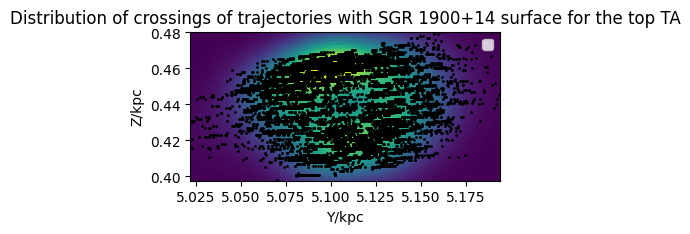

In [ ]:
from matplotlib.patches import Circle

v

#fig.suptitle('', y=1)

ax.pcolormesh(X_30, Y_30, Z_30)

ax.scatter(cords30['Y'], cords30['Z'], c='k', s=1)

#NGC 6760 Globular Cluster
#ax.scatter(point_of_interest_22[0], point_of_interest_22[1], c='r')
#ax.text(7.95, 0.3, 'NGC 6760', fontsize=9, fontweight='bold', c = 'red')
#ax.text(7.95, 0.3, 'SGR 1900+14', fontsize=9, fontweight='bold', c = 'red')

#d to ngc 7.4, to sgr 12.5
#circle = Circle((point_of_interest_22[0], point_of_interest_22[1]), np.pi*12.5/180, edgecolor='black', facecolor='none', linewidth=1, label=r'$1^{\circ}$ circle around object')
#ax.add_patch(circle)
ax.set_aspect('equal')
ax.set_xlabel('Y/kpc')
ax.set_ylabel('Z/kpc')
ax.set_title('Distribution of crossings of trajectories with SGR 1900+14 surface for the top TA')

ax.legend()
#plt.savefig("scatter_kde_31.png", dpi=300, bbox_inches='tight')

{'bandwidth': 0.61}


0.3988326522138149

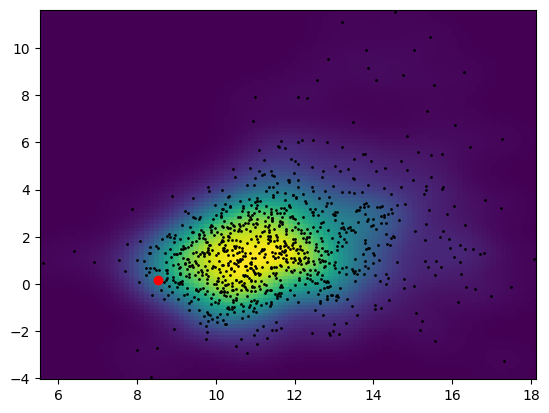

In [ ]:
#EXAMPLE OF KDE calculation with gridsearch

cords = cords22

xy = np.vstack([cords['Y'], cords['Z']])
d = xy.shape[0]
n = xy.shape[1]

grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.01, 1.0, 100)},
                    cv=20) # 20-fold cross-validation with 100 bandwidths
grid.fit(xy.T)
print(grid.best_params_)
kde = grid.best_estimator_

xmin = cords['Y'].min()
xmax = cords['Y'].max()
ymin = cords['Z'].min()
ymax = cords['Z'].max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])

Z = np.reshape(np.exp(kde.score_samples(positions.T)), X.shape)

plt.pcolormesh(X, Y, Z)

plt.scatter(cords['Y'], cords['Z'], c='k', s=1)
plt.scatter(sgr_cords[2], sgr_cords[3], c='r')

point = np.array([
    [sgr_cords[2], 7.342, 8.4],
    [sgr_cords[3], -1.031, 0.5]
])

np.exp(kde.score_samples(point.T))[0]/Z.max()

{'bandwidth': 0.04}


0.13156930199578584

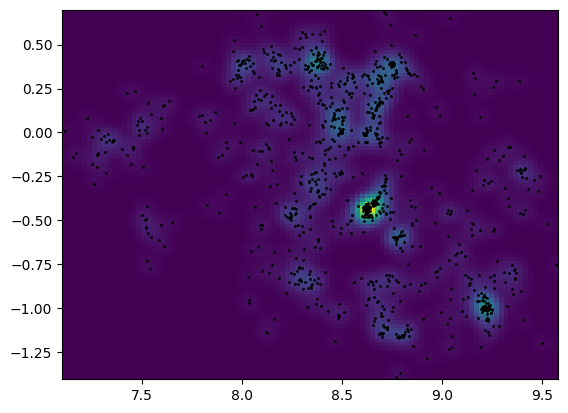

In [ ]:
#EXAMPLE OF KDE calculation with gridsearch

cords = cords31

xy = np.vstack([cords['Y'], cords['Z']])
d = xy.shape[0]
n = xy.shape[1]

grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.01, 1.0, 100)},
                    cv=20) # 20-fold cross-validation with 100 bandwidths
grid.fit(xy.T)
print(grid.best_params_)
kde = grid.best_estimator_

xmin = cords['Y'].min()
xmax = cords['Y'].max()
ymin = cords['Z'].min()
ymax = cords['Z'].max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])

Z = np.reshape(np.exp(kde.score_samples(positions.T)), X.shape)

plt.pcolormesh(X, Y, Z)

plt.scatter(cords['Y'], cords['Z'], c='k', s=1)

point = np.array([
    [sgr_cords[2], 7.342, 8.4],
    [sgr_cords[3], -1.031, 0.5]
])

np.exp(kde.score_samples(point.T))[0]/Z.max()

With ortogonal transformation

In [ ]:
abs_norm = np.sqrt(norm[0]**2 + norm[1]**2 + norm[2]**2)

In [ ]:
alpha = np.arccos(norm[0]/abs_norm)
beta = np.arccos(norm[1]/abs_norm)
gamma = np.arccos(norm[2]/abs_norm)

In [ ]:
def p_mat(angle):
  p_matrix = np.array([
    [1,           0,                 0],
    [0, np.cos(angle),   -np.sin(angle)],
    [0, np.sin(angle),  np.cos(angle)]
  ])
  return p_matrix

def q_mat(angle):
  q_matrix = np.array([
    [np.cos(angle), 0, np.sin(angle)],
    [0,             1,              0],
    [-np.sin(angle), 0,  np.cos(angle)]
  ])
  return q_matrix

def r_mat(angle):
  r_matrix = np.array([
    [np.cos(angle), -np.sin(angle), 0],
    [np.sin(angle), np.cos(angle),   0],
    [0,               0,           1]
  ])
  return r_matrix

In [ ]:
x, y, z = [], [], []
I,X,Y,Z = data_31
for i in np.unique(I):
  norm, D_plane = calcPerpPlane(sgr_cords, earth_cords)
  _x, _y, _z = calcEdge(X[I == i], Y[I == i], Z[I == i], norm, D_plane)
  x.append(_x[-1])
  y.append(_y[-1])
  z.append(_z[-1])

In [ ]:
x, y, z = np.array(x), np.array(y), np.array(z)#np.array(x).reshape(-1,1), np.array(y).reshape(-1,1), np.array(z).reshape(-1,1)

In [ ]:
x_rot = x * np.cos(-alpha) + y * (-np.sin(-alpha))
y_rot = x * np.sin(-alpha) + y * np.cos(-alpha)
z_rot = z

In [ ]:
x_rot = x_rot *  np.cos(gamma) + z_rot * np.sin(gamma)
y_rot = y_rot
z_rot = x_rot * -np.sin(gamma) + z_rot * np.cos(gamma)

In [ ]:
data_before_rot = np.vstack((x,y,z))
data_after_rot = np.matmul(r_mat(alpha), data_before_rot)
#data_after_rot = np.matmul(q_mat(-gamma), data_after_rot)

In [ ]:
sgr_trans = np.array(sgr_cords[1:]).reshape(-1,1)
sgr_rot = np.matmul(r_mat(alpha), sgr_trans)
#sgr_rot = np.matmul(q_mat(-gamma), sgr_rot)

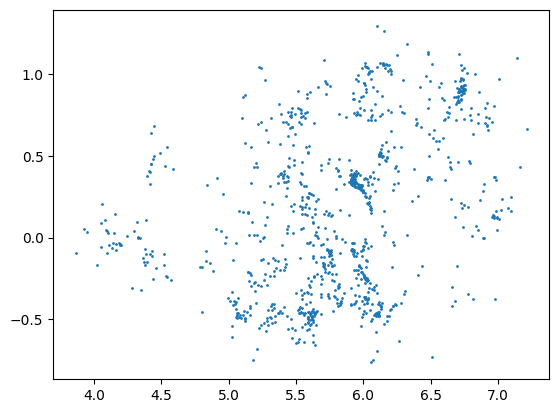

In [ ]:
#plt.scatter(data_after_rot[1:2], data_after_rot[2:], s = 1)
plt.scatter(y_rot, z_rot, s = 1)
#plt.scatter(sgr_rot[1], sgr_rot[2], marker='+', c='red', s=80)

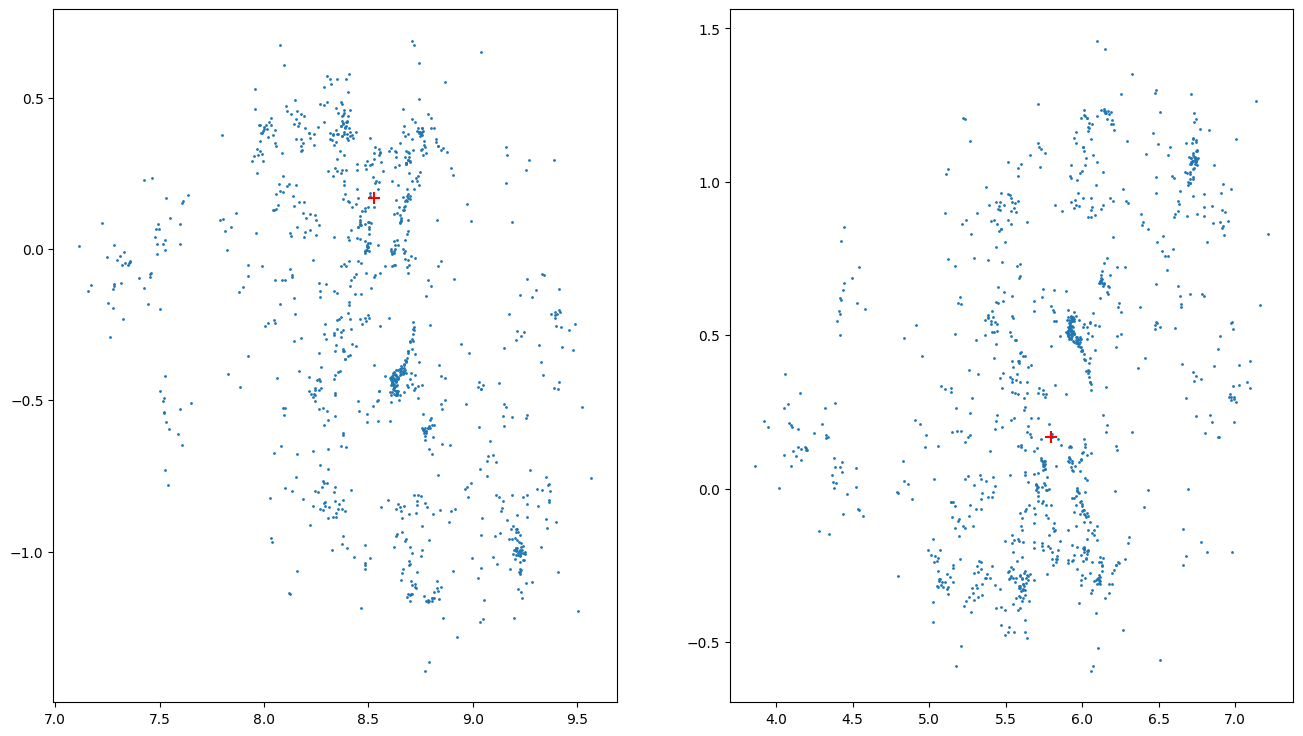

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))

ax1.scatter(y_nonrot, z_nonrot, s = 1)
ax1.scatter(sgr_cords[2], sgr_cords[3], marker='+', c='red', s=80)

#ax2.scatter(data_after_rot[1:2], data_after_rot[2:], s = 1)
ax2.scatter(y_rot, z_rot, s = 1)
ax2.scatter(sgr_rot[1], sgr_rot[2], marker='+', c='red', s=80)

### Projections approach with finding distance to line (deprecated)

Lets build in each projection projection of surface which perpendicular to our line of sight and find coords of points which they have crossing that surface

In [ ]:
earth_cords = [0, -8.5, 0, 0]
sgr_cords = [0, 12.5*np.cos(43.02*np.pi/180)*np.cos(0.77*np.pi/180) - 8.5, 12.5*np.sin(43.02*np.pi/180)*np.cos(0.77*np.pi/180), 12.5*np.sin(0.77*np.pi/180)]

In [ ]:
def calcPerpLine(x_sgr, y_sgr, x_earth, y_earth):
  '''Calculates the k and b for line of sight and a perp line to it'''
  k = (y_earth - y_sgr)/(x_earth - x_sgr)
  b = (x_earth*y_sgr - x_sgr*y_earth)/(x_earth - x_sgr)
  x_sight = np.linspace(-8.5, 10, 10)
  y_sight = k*x_sight + b
  #So, perpendicular line will have -1/k
  k_perp = -1/k
  b_perp = y_sgr - k_perp*x_sgr
  x_perp = np.linspace(-8.5, 10, 10)
  y_perp = k_perp*x_perp + b_perp

  return k, b, k_perp, b_perp

In [ ]:
def calcEdge(x, y, k_perp, b_perp):
  ''' Finds Last point which crosses observational surface'''
  old_distance = 1e5
  for idx in range(len(x)):
    new_distance = abs(y[idx] - (k_perp*x[idx] + b_perp))
    if new_distance > old_distance:
      x = x[:idx]
      y = y[:idx]
      return x, y
    else:
      old_distance = new_distance

In [ ]:
I,X,Y,Z = data_31
for i in np.unique(I):
  k, b, k_perp, b_perp = calcPerpLine(sgr_cords[1], sgr_cords[2], earth_cords[1], earth_cords[2])
  x, y = calcEdge(X[I == i], Y[I == i], k_perp, b_perp)
  plt.plot(x, y, lw=0.1, alpha=0.3, color='green')

plt.scatter(sgr_cords[1], sgr_cords[2], marker='+', c='red', s=80) #43.02 0.77 12.5±1.7
#plt.plot(np.linspace(-8.5, 10, 10), k*np.linspace(-8.5, 10, 10) + b, color='red')
#plt.plot(np.linspace(-8.5, 10, 10), k_perp*np.linspace(-8.5, 10, 10) + b_perp, color='red')

TypeError: cannot unpack non-iterable NoneType object

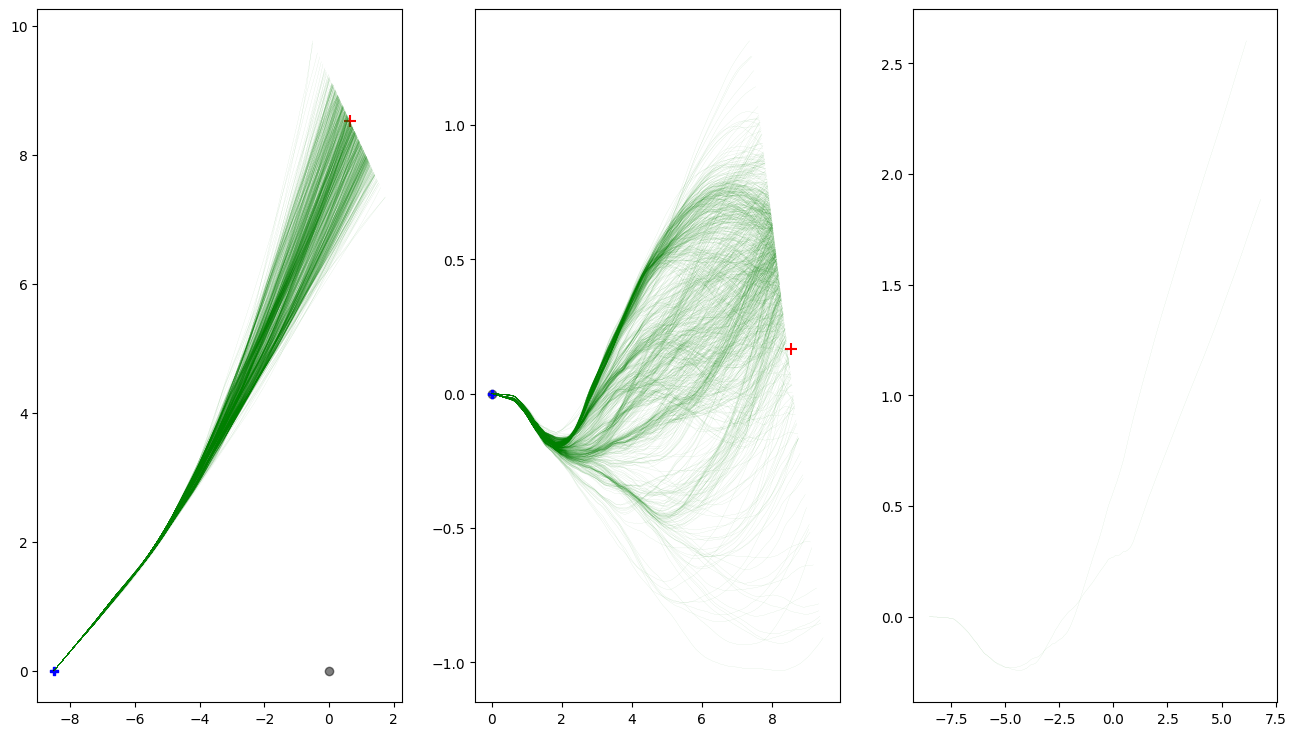

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 9))

'''
This approach build 3 different planes, but for real calculations only one was built!!!
'''

fig.suptitle('')
I,X,Y,Z = data_23
projections = [ax1, ax2, ax3]
for projection, axis in enumerate([(1,2), (2,3), (1,3)]):
  k, b, k_perp, b_perp = calcPerpLine(sgr_cords[axis[0]], sgr_cords[axis[1]], earth_cords[axis[0]], earth_cords[axis[1]])
  for i in np.unique(I):
    x, y = calcEdge([I,X,Y,Z][axis[0]][I == i], [I,X,Y,Z][axis[1]][I == i], k_perp, b_perp)
    projections[projection].plot(x, y, lw=0.1, alpha=0.3, color='green')

  #projections[projection].plot(np.linspace(-8.5, 10, 10), k*np.linspace(-8.5, 10, 10) + b, color='red')
  #projections[projection].plot(np.linspace(-8.5, 10, 10), k_perp*np.linspace(-8.5, 10, 10) + b_perp, color='red')
  # plot Galactic center
  projections[projection].scatter(0,0, marker='o', color='black', alpha=0.5)
  # plot Earth
  earth_cords = [0, -8.5, 0, 0] #first 0 stands for I in data for generalising formulas (previously in scatter I've written earth_cords[axis[0] - 1])
  projections[projection].scatter(earth_cords[axis[0]], earth_cords[axis[1]], marker='P', color='blue')
  #Plot SGR 1900+14
  sgr_cords = [0, 12.5*np.cos(43.02*np.pi/180)*np.cos(0.77*np.pi/180) - 8.5, 12.5*np.sin(43.02*np.pi/180)*np.cos(0.77*np.pi/180), 12.5*np.sin(0.77*np.pi/180)]
  projections[projection].scatter(sgr_cords[axis[0]], sgr_cords[axis[1]], marker='+', c='red', s=80) #43.02 0.77 12.5±1.7
  #labels = ['I', 'X', 'Y', 'Z']
  #projections[projection].set(xlabel=f"{labels[axis[0]]} / kpc", ylabel=f"{labels[axis[1]]} / kpc")
  #projections[projection].set_title(f"{labels[axis[0]]}O{labels[axis[1]]} flat surface")
#Legend
from matplotlib.lines import Line2D
legend_elements = [
                  Line2D([0], [0], marker='+', color='red', label='SGR 1900+14', markerfacecolor='red', linestyle='', markersize=8),
                  Line2D([0], [0], marker='P', color='blue', label='Earth', markerfacecolor='blue', linestyle='', markersize=8),
                  Line2D([0], [0], marker='o', color='black', label='Galaxy Center', markerfacecolor='black', linestyle='', markersize=8),
                  Line2D([0], [0], lw=1, color='green', label='C'),
                  ]
fig.legend(handles=legend_elements, loc='upper right')

plt.show()

In [ ]:
def plot3D(data) -> None:
  fig = plt.figure(figsize=(12,12))
  ax = plt.subplot(111, projection='3d')

  # plot trajectories
  I,X,Y,Z = data
  for i in np.unique(I):
    ax.plot(X[I == i], Y[I == i], Z[I == i], lw=0.1, alpha=0.3, color='green')

  # plot Galactic border
  r = 20
  u, v = np.meshgrid(np.linspace(0, 2*np.pi, 100), np.linspace(0, np.pi, 100))
  x = r * np.cos(u) * np.sin(v)
  y = r * np.sin(u) * np.sin(v)
  z = r * np.cos(v)
  ax.plot_surface(x, y, z, rstride=2, cstride=2, color='r', alpha=0.1, lw=0)
  ax.plot_wireframe(x, y, z, rstride=10, cstride=10, color='k', alpha=0.5, lw=0.3)

  # plot Galactic center
  ax.scatter(0,0,0, marker='o', color='r')
  # plot Earth
  ax.scatter(-8.5,0,0, marker='P', color='b')

  #Plotting potential sources
  #Plot SGR 1900+14
  ax.scatter(12.5*np.cos(43.02*np.pi/180)*np.cos(0.77*np.pi/180) - 8.5, 12.5*np.sin(43.02*np.pi/180)*np.cos(0.77*np.pi/180), 12.5*np.sin(0.77*np.pi/180), marker='+', c='red', s=70) #43.02 0.77 12.5±1.7
  #plt.text(0.751-2*0.751 - 15*np.pi/180, 0.0135+7*np.pi/180, 'SGR 1900+14', fontsize=8, fontweight='bold')
  #Plot GRS 1915+105
  ax.scatter(8.6*np.cos(45.37*np.pi/180)*np.cos(-0.22*np.pi/180) - 8.5, 8.6*np.sin(45.37*np.pi/180)*np.cos(-0.22*np.pi/180), 8.6*np.sin(-0.22*np.pi/180), marker='+', c='green', s=70) #45.37 -0.22 8.6+2.0-1.6
  #Plot SS 433 Мікроквазар 39.69 -2.24 5.5±0.2
  ax.scatter(5.5*np.cos(39.69*np.pi/180)*np.cos(-2.24*np.pi/180) - 8.5, 5.5*np.sin(39.69*np.pi/180)*np.cos(-2.24*np.pi/180), 5.5*np.sin(-2.24*np.pi/180), marker='+', c='purple', s=70) #39.69 -2.24 5.5±0.2
  #Plot NGC 6760 Кулясте скупчення 36.11 -3.9 7.4±0.4
  ax.scatter(7.4*np.cos(36.11*np.pi/180)*np.cos(-3.9*np.pi/180) - 8.5, 7.4*np.sin(36.11*np.pi/180)*np.cos(-3.9*np.pi/180), 7.4*np.sin(-3.9*np.pi/180), marker='+', c='magenta', s=70) #36.11 -3.9 7.4±0.4

  from matplotlib.lines import Line2D
  legend_elements = [Line2D([0], [0], color='blue', lw=1, label='Simulated CRs'),
                      Line2D([0], [0], marker='+', color='red', label='SGR 1900+14', markerfacecolor='red', linestyle='', markersize=8),
                      Line2D([0], [0], marker='+', color='green', label='GRS 1915+105', markerfacecolor='green', linestyle='', markersize=8),
                      Line2D([0], [0], marker='+', color='purple', label='SS 433', markerfacecolor='purple', linestyle='', markersize=8),
                      Line2D([0], [0], marker='+', color='magenta', label='NGC 6760', markerfacecolor='magenta', linestyle='', markersize=8)
                      ]
  fig.legend(handles=legend_elements, loc='upper right')

  ax.tick_params(axis='both', which='major', labelsize=16)
  ax.tick_params(axis='both', which='minor', labelsize=16)
  ax.set_xlabel('x / kpc', fontsize=18)
  ax.set_ylabel('y / kpc', fontsize=18)
  ax.set_zlabel('z / kpc', fontsize=18)
  ax.set_xlim((-20, 20))
  ax.set_ylim((-20, 20))
  ax.set_zlim((-20, 20))
  ax.xaxis.set_ticks((-20,-10,0,10,20))
  ax.yaxis.set_ticks((-20,-10,0,10,20))
  ax.zaxis.set_ticks((-20,-10,0,10,20))
  plt.show()

(643576,) (631,) [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193.

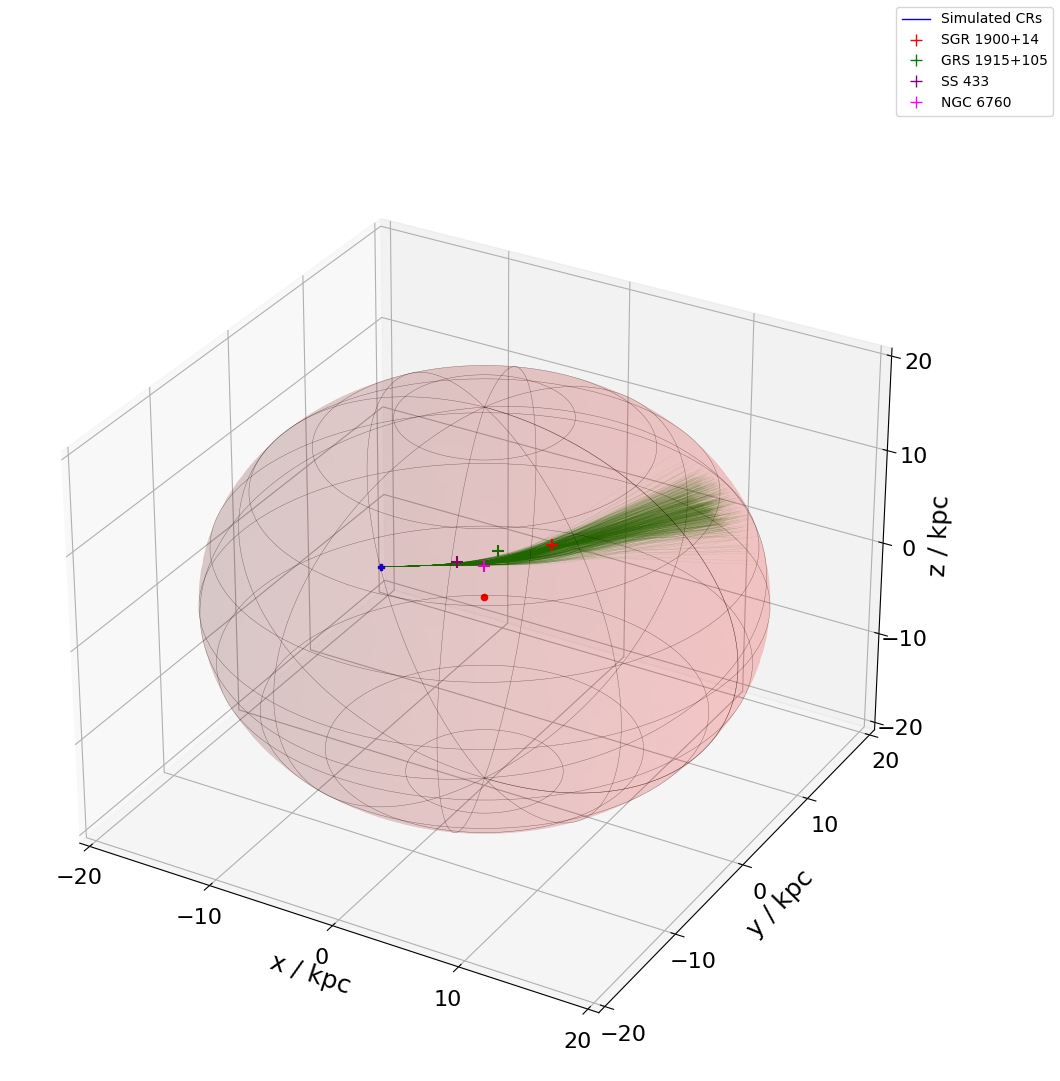

In [ ]:
plot3D(data_31)

In [ ]:
k, b, k_perp, b_perp = calcPerpLine(sgr_cords[1], sgr_cords[2], earth_cords[1], earth_cords[2])
I,X,Y,Z = data_31
x, y = [], []
for i in np.unique(I):
  _x, _y = calcEdge([I,X,Y,Z][axis[0]][I == i], [I,X,Y,Z][axis[1]][I == i], k_perp, b_perp)
  x.append(_x[-1])
  y.append(_y[-1])

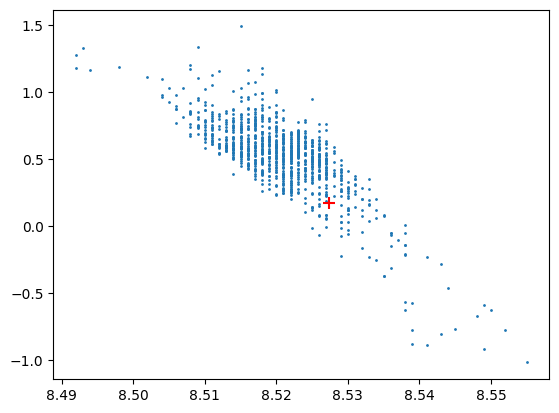

In [ ]:
plt.scatter(y_1, z, s = 1)
plt.scatter(sgr_cords[2], sgr_cords[3], marker='+', c='red', s=80)

# Seed check

In [ ]:
#data_C = pd.read_csv('drive/MyDrive/High_energy_astro/seed_test/results_for_C.csv')
#data_C_rotated = pd.read_csv('drive/MyDrive/High_energy_astro/seed_test/results_for_C_rotated.csv')
#data_H = pd.read_csv('drive/MyDrive/High_energy_astro/seed_test/results_for_H.csv')
#data_H_rotated = pd.read_csv('drive/MyDrive/High_energy_astro/seed_test/results_for_H_rotated.csv')
#data_Fe = pd.read_csv('drive/MyDrive/High_energy_astro/seed_test/results_for_Fe.csv')
#data_Fe_rotated = pd.read_csv('drive/MyDrive/High_energy_astro/seed_test/results_for_Fe_rotated.csv')
data_C_rotated_hit = pd.read_csv('drive/MyDrive/High_energy_astro/seed_test/results_for_C_rotated_hitMetric.csv')
data_C_rotated_hit_corr = pd.read_csv('drive/MyDrive/High_energy_astro/seed_test/results_for_C_rotated_hitMetric_corr.csv')

In [ ]:
data_C_rotated_hit_corr

,Unnamed: 0,Event,Object,Seed,Hit
0,0,30,sgr,268435450,"(0, 0.0)"
1,1,30,grs,268435450,"(0, 0.0)"
2,2,30,ss,268435450,"(0, 0.0)"
3,3,30,ngc_cords,268435450,"(0, 0.0)"
4,4,30,sgr,977105038,"(0, 0.0)"
...,...,...,...,...,...
1219,1219,23,ngc_cords,246960614,"(0, 0.0)"
1220,1220,22,sgr,944892784,"(0, 0.0)"
1221,1221,22,grs,944892784,"(0, 0.0)"
1222,1222,22,ss,944892784,"(0, 0.0)"


In [ ]:
data_C_rotated_hit_corr['Hit'] = data_C_rotated_hit_corr['Hit'].apply(lambda x: float(x.split(',')[1][:-1]))

In [ ]:
'''
data_C_22 = data_C[data_C['Event'] == 22]
data_C_23 = data_C[data_C['Event'] == 23]
data_C_30 = data_C[data_C['Event'] == 30]

data_C_22_rotated = data_C_rotated[data_C_rotated['Event'] == 22]
data_C_23_rotated = data_C_rotated[data_C_rotated['Event'] == 23]
data_C_30_rotated = data_C_rotated[data_C_rotated['Event'] == 30]

data_H_22 = data_H[data_H['Event'] == 22]
data_H_23 = data_H[data_H['Event'] == 23]
data_H_30 = data_H[data_H['Event'] == 30]

data_H_22_rotated = data_H_rotated[data_H_rotated['Event'] == 22]
data_H_23_rotated = data_H_rotated[data_H_rotated['Event'] == 23]
data_H_30_rotated = data_H_rotated[data_H_rotated['Event'] == 30]

data_Fe_22 = data_Fe[data_Fe['Event'] == 22]
data_Fe_23 = data_Fe[data_Fe['Event'] == 23]
data_Fe_30 = data_Fe[data_Fe['Event'] == 30]

data_Fe_22_rotated = data_Fe_rotated[data_Fe_rotated['Event'] == 22]
data_Fe_23_rotated = data_Fe_rotated[data_Fe_rotated['Event'] == 23]
data_Fe_30_rotated = data_Fe_rotated[data_Fe_rotated['Event'] == 30]
'''
data_C_22_rotated_hit = data_C_rotated_hit[data_C_rotated_hit['Event'] == 22]
data_C_23_rotated_hit = data_C_rotated_hit[data_C_rotated_hit['Event'] == 23]
data_C_30_rotated_hit = data_C_rotated_hit[data_C_rotated_hit['Event'] == 30]

In [ ]:
data_Fe_22.shape, data_Fe_22_rotated.shape

((404, 5), (404, 5))

In [ ]:
'''
'#377eb8', '#ff7f00', '#4daf4a',
'#f781bf', '#a65628', '#984ea3',
'#999999', '#e41a1c', '#dede00'
'''

"\n'#377eb8', '#ff7f00', '#4daf4a',\n'#f781bf', '#a65628', '#984ea3',\n'#999999', '#e41a1c', '#dede00'\n"

In [ ]:
#data_temp_22, data_temp_23, data_temp_30 = data_C_22, data_C_23, data_C_30
#data_temp_22, data_temp_23, data_temp_30 = data_C_22_rotated, data_C_23_rotated, data_C_30_rotated
#data_temp_22, data_temp_23, data_temp_30 = data_H_22, data_H_23, data_H_30
#data_temp_22, data_temp_23, data_temp_30 = data_H_22_rotated, data_H_23_rotated, data_H_30_rotated
data_temp_22, data_temp_23, data_temp_30 = data_C_22_rotated_hit, data_C_23_rotated_hit, data_C_30_rotated_hit
#data_temp_22, data_temp_23, data_temp_30 = data_Fe_22_rotated, data_Fe_23_rotated, data_Fe_30_rotated

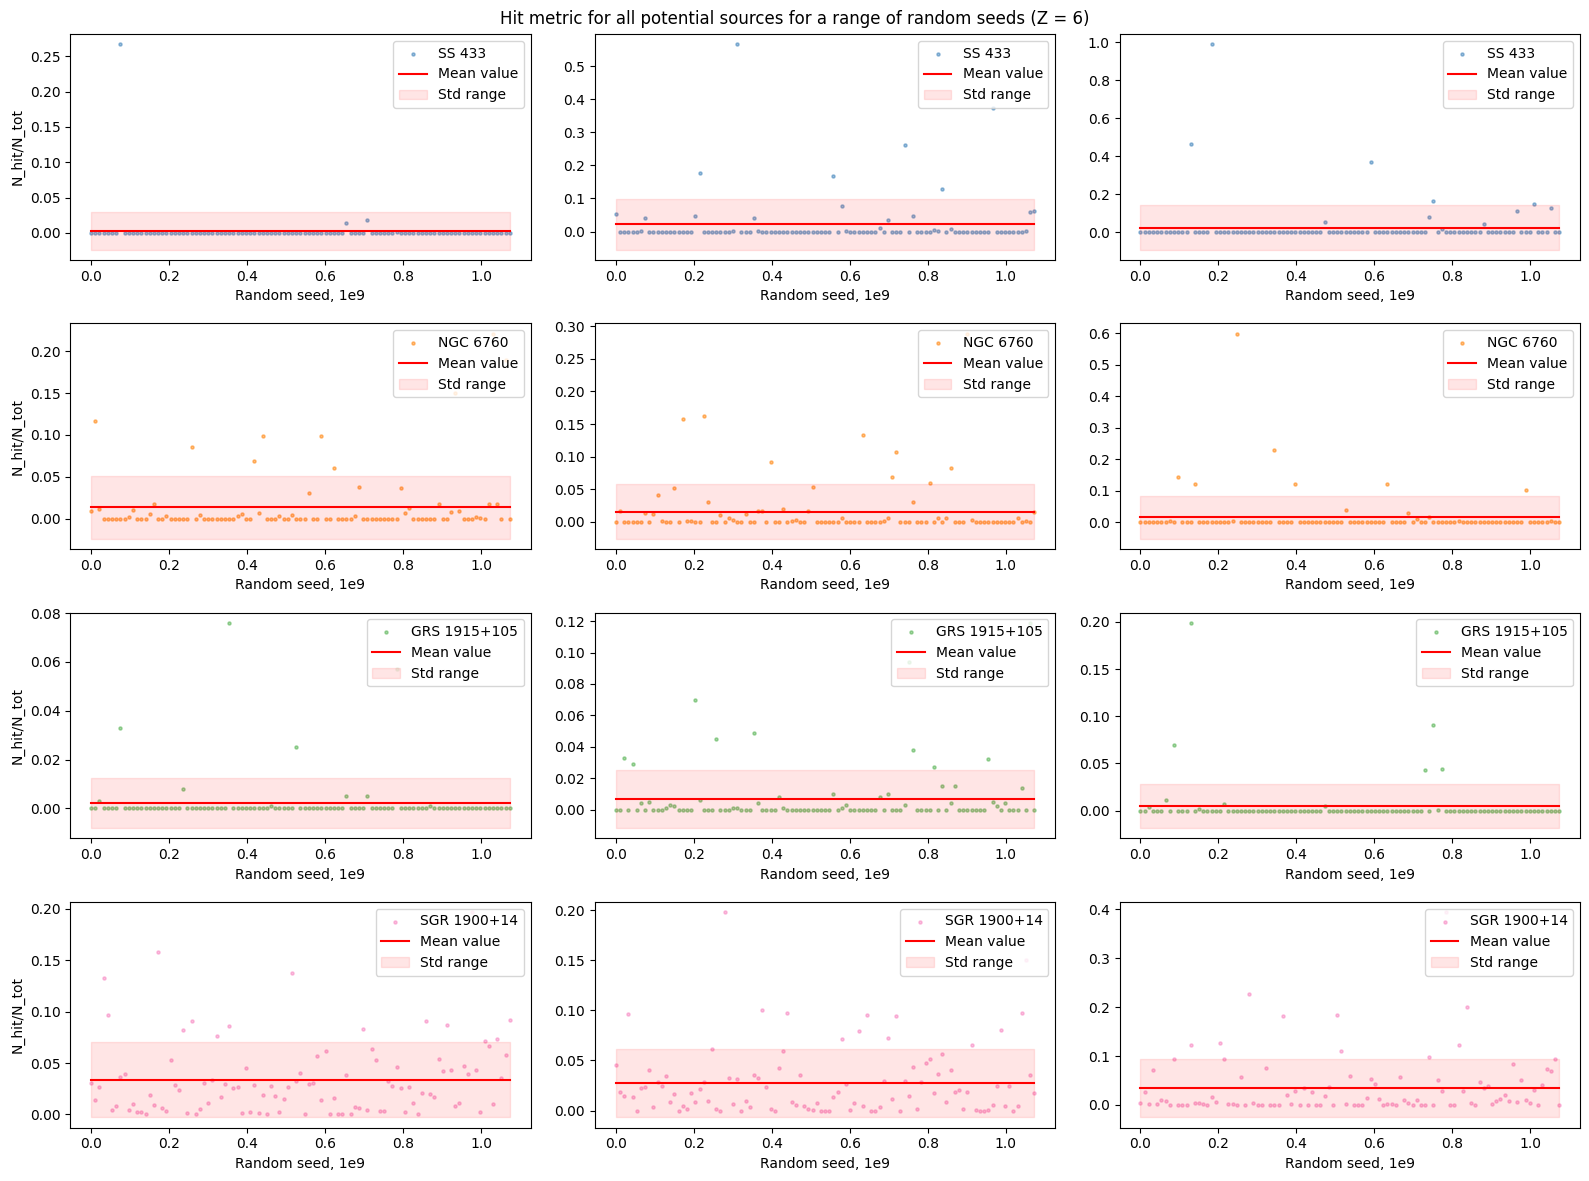

In [ ]:
fig, ((ax11, ax12, ax13), (ax21, ax22, ax23), (ax31, ax32, ax33), (ax41, ax42, ax43)) = plt.subplots(4, 3, figsize=(16, 12))
fig.suptitle('Hit metric for all potential sources for a range of random seeds (Z = 6)')
projections = [(ax11, ax12, ax13), (ax21, ax22, ax23), (ax31, ax32, ax33), (ax41, ax42, ax43)]
objects = ['ss', 'ngc_cords', 'grs', 'sgr']
object_names = ['SS 433', 'NGC 6760', 'GRS 1915+105', 'SGR 1900+14']
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf']
seed_min, seed_max = data_temp_22[data_temp_22['Object'] == objects[0]]['Seed'].min(), data_temp_22[data_temp_22['Object'] == objects[0]]['Seed'].max()/1e9
s = 5

metric = 'Hit'
for idx, line in enumerate(projections):
  line[0].scatter(data_temp_22[data_temp_22['Object'] == objects[idx]]['Seed']/1e9, data_temp_22[data_temp_22['Object'] == objects[idx]][metric], s=s, label=object_names[idx], c = colors[idx], alpha = 0.5)
  line[0].set(xlabel="Random seed, 1e9", ylabel=f"N_hit/N_tot")#f"P({object_names[idx]})/max(P(y,z))")
  score_mean = data_temp_22[data_temp_22['Object'] == objects[idx]][metric].mean()
  score_std = data_temp_22[data_temp_22['Object'] == objects[idx]][metric].std()
  line[0].plot(np.linspace(seed_min, seed_max, 100), np.full((100), score_mean), c='r', label='Mean value')#Mean line
  line[0].fill_between(np.linspace(seed_min, seed_max, 100), score_mean - score_std, score_mean + score_std, color='r', alpha=0.1, label='Std range')#Std shade
  #line[0].set_xscale('log')
  line[0].legend(loc='upper right')

  line[1].scatter(data_temp_23[data_temp_23['Object'] == objects[idx]]['Seed']/1e9, data_temp_23[data_temp_23['Object'] == objects[idx]][metric], s=s, label=object_names[idx], c = colors[idx], alpha = 0.5)
  line[1].set(xlabel="Random seed, 1e9")
  score_mean = data_temp_23[data_temp_23['Object'] == objects[idx]][metric].mean()
  score_std = data_temp_23[data_temp_23['Object'] == objects[idx]][metric].std()
  line[1].plot(np.linspace(seed_min, seed_max, 100), np.full((100), score_mean), c='r', label='Mean value')#Mean line
  line[1].fill_between(np.linspace(seed_min, seed_max, 100), score_mean - score_std, score_mean + score_std, color='r', alpha=0.1, label='Std range')#Std shade
  #line[1].set_xscale('log')
  line[1].legend(loc='upper right')

  line[2].scatter(data_temp_30[data_temp_30['Object'] == objects[idx]]['Seed']/1e9, data_temp_30[data_temp_30['Object'] == objects[idx]][metric], s=s, label=object_names[idx], c = colors[idx], alpha = 0.5)
  line[2].set(xlabel="Random seed, 1e9")
  score_mean = data_temp_30[data_temp_30['Object'] == objects[idx]][metric].mean()
  score_std = data_temp_30[data_temp_30['Object'] == objects[idx]][metric].std()
  line[2].plot(np.linspace(seed_min, seed_max, 100), np.full((100), score_mean), c='r', label='Mean value')#Mean line
  line[2].fill_between(np.linspace(seed_min, seed_max, 100), score_mean - score_std, score_mean + score_std, color='r', alpha=0.1, label='Std range')#Std shade
  #line[2].set_xscale('log')
  line[2].legend(loc='upper right')

fig.tight_layout()
plt.savefig('random_seed_check_C.jpeg', dpi=300, bbox_inches='tight')
plt.show()

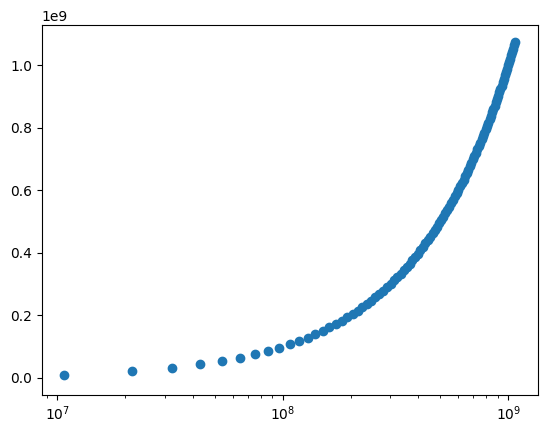

In [ ]:
plt.scatter(np.linspace(np.unique(data_C['Seed']).min(), np.unique(data_C['Seed']).max(), len(np.unique(data_C['Seed']))), np.unique(data_C['Seed']))
plt.xscale('log')